# Лабораторная работа №4

## Реализация приложения по распознаванию номеров домов

Набор изображений из _Google Street View_ с изображениями номеров домов, содержащий 10 классов, соответствующих цифрам от 0 до 9.

* 73257 изображений цифр в обучающей выборке;

* 26032 изображения цифр в тестовой выборке;

* 531131 изображения, которые можно использовать как дополнение к обучающей выборке;

* В двух форматах:

    * Оригинальные изображения с выделенными цифрами;

    * Изображения размером 32×32, содержащие одну цифру;

* Данные первого формата можно скачать по ссылкам:

    * http://ufldl.stanford.edu/housenumbers/train.tar.gz (обучающая выборка);

    * http://ufldl.stanford.edu/housenumbers/test.tar.gz (тестовая выборка);

    * http://ufldl.stanford.edu/housenumbers/extra.tar.gz (дополнительные данные);

* Данные второго формата можно скачать по ссылкам:

    * http://ufldl.stanford.edu/housenumbers/train_32x32.mat (обучающая выборка);

    * http://ufldl.stanford.edu/housenumbers/test_32x32.mat (тестовая выборка);

    * http://ufldl.stanford.edu/housenumbers/extra_32x32.mat (дополнительные данные);

* Описание данных на английском языке доступно по ссылке:

    * http://ufldl.stanford.edu/housenumbers/

### Задание 1

Реализуйте глубокую нейронную сеть (полносвязную или сверточную) и обучите ее на синтетических данных (например, наборы _MNIST_ (http://yann.lecun.com/exdb/mnist/) или _notMNIST_).

Ознакомьтесь с имеющимися работами по данной тематике: англоязычная статья ( http://static.googleusercontent.com/media/research.google.com/en//pubs/archive/42241.pdf ), видео на _YouTube_ (https://www.youtube.com/watch?v=vGPI_JvLoN0).

Используем архитектуру _LeNet-5_ и обучим сеть сначала на данных из набора _MNIST_.

In [0]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive

drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [0]:
! pip install tensorflow-gpu --pre --quiet

In [0]:
import tensorflow as tf
from tensorflow import keras

# To fix memory leak: https://github.com/tensorflow/tensorflow/issues/33009

tf.compat.v1.disable_eager_execution()

In [0]:
import numpy as np

In [0]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [0]:
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

In [9]:
from tensorflow.keras.utils import to_categorical

y_train, y_test = to_categorical(y_train), to_categorical(y_test)

y_train.shape

(60000, 10)

In [0]:
IMAGE_DIM_0, IMAGE_DIM_1 = x_train.shape[1], x_train.shape[2]

In [0]:
CLASSES_N = y_train.shape[1]

In [12]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import AveragePooling2D, Conv2D, Dense, Flatten

model = tf.keras.Sequential()

model.add(Conv2D(6, kernel_size = (5, 5), strides = (1, 1),
                 activation = 'tanh', padding = 'same',
                 input_shape = (IMAGE_DIM_0, IMAGE_DIM_1, 1)))
model.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2),
                           padding = 'valid'))
model.add(Conv2D(16, kernel_size = (5, 5), strides = (1, 1),
                 activation = 'tanh', padding = 'valid'))
model.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2),
                           padding = 'valid'))
model.add(Flatten())
model.add(Dense(120, activation = 'tanh'))
model.add(Dense(84, activation = 'tanh'))
model.add(Dense(CLASSES_N, activation = 'softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
# 'sparse_categorical_crossentropy' gave NAN loss

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['categorical_accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [0]:
EPOCHS_N = 20

In [0]:
history = model.fit(x = x_train, y = y_train, validation_split = 0.15,
                    epochs = EPOCHS_N, verbose = 0)

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

rcParams['figure.figsize'] = 8, 6

sns.set()
sns.set_palette(sns.color_palette('hls'))

def plot_accuracy(_history,
                  _train_acc_name = 'accuracy',
                  _val_acc_name = 'val_accuracy'):

    plt.plot(_history.history[_train_acc_name])
    plt.plot(_history.history[_val_acc_name])

    plt.title('Model accuracy')

    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')

    plt.legend(['Train', 'Validation'], loc = 'right')

    plt.show()

def plot_loss(_history,
              _train_loss_name = 'loss',
              _val_loss_name = 'val_loss'):

    plt.plot(_history.history[_train_loss_name])
    plt.plot(_history.history[_val_loss_name])

    plt.title('Model loss')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')

    plt.legend(['Train', 'Validation'], loc = 'right')

    plt.show()

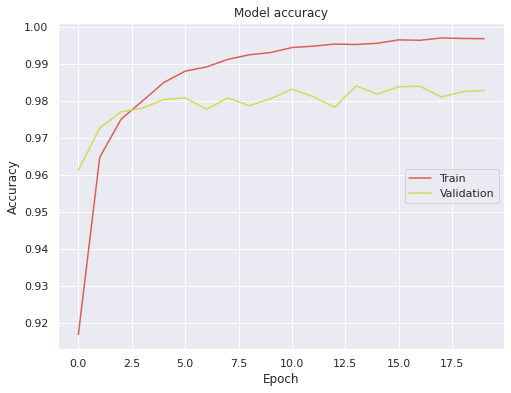

In [19]:
plot_accuracy(history, 'categorical_accuracy', 'val_categorical_accuracy')

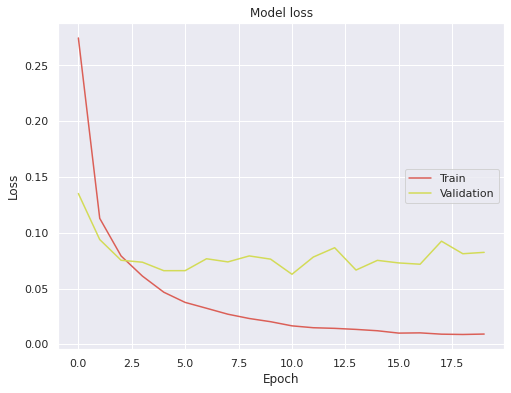

In [20]:
plot_loss(history)

In [21]:
results = model.evaluate(x_test, y_test)

print('Test loss, test accuracy:', results)

Test loss, test accuracy: [0.0783945622475956, 0.9802]


Удалось достичь отличного результата &mdash; точность распознавания на тестовой выборке составила 98%.

### Задание 2

После уточнения модели на синтетических данных попробуйте обучить ее на реальных данных (набор _Google Street View_). Что изменилось в модели?

##### Одна цифра

In [0]:
DS_URL_FOLDER = 'http://ufldl.stanford.edu/housenumbers/'

FIRST_DS_EXT = '.tar.gz'
SECOND_DS_EXT = '_32x32.mat'

TRAIN_DS_NAME = 'train'
TEST_DS_NAME = 'test'
EXTRA_DS_NAME = 'extra'

In [0]:
from urllib.request import urlretrieve
import tarfile
import os

def load_file(_url_folder, _name, _ext, _key, _local_ext = ''):

    file_url_ = _url_folder + _name + _ext

    local_file_name_ = _name + '_' + _key + _local_ext

    urlretrieve(file_url_, local_file_name_)

    return local_file_name_

def tar_gz_to_dir(_url_folder, _name, _ext, _key):

    local_file_name_ = load_file(_url_folder, _name, _ext, _key, _ext)

    dir_name_ = _name + '_' + _key
    
    with tarfile.open(local_file_name_, 'r:gz') as tar_:
        tar_.extractall(dir_name_)

    os.remove(local_file_name_)

    return dir_name_

In [0]:
second_ds_train_file = load_file(DS_URL_FOLDER, TRAIN_DS_NAME, SECOND_DS_EXT,
                                 'second')
second_ds_test_file = load_file(DS_URL_FOLDER, TEST_DS_NAME, SECOND_DS_EXT,
                                'second')
second_ds_extra_file = load_file(DS_URL_FOLDER, EXTRA_DS_NAME, SECOND_DS_EXT,
                                 'second')

In [0]:
from scipy import io

second_ds_train = io.loadmat(second_ds_train_file)
second_ds_test = io.loadmat(second_ds_test_file)
second_ds_extra = io.loadmat(second_ds_extra_file)

In [26]:
X_second_ds_train = np.moveaxis(second_ds_train['X'], -1, 0)
X_second_ds_test = np.moveaxis(second_ds_test['X'], -1, 0)
X_second_ds_extra = np.moveaxis(second_ds_extra['X'], -1, 0)

y_second_ds_train = second_ds_train['y']
y_second_ds_test = second_ds_test['y']
y_second_ds_extra = second_ds_extra['y']

print(X_second_ds_train.shape, y_second_ds_train.shape)
print(X_second_ds_test.shape, y_second_ds_test.shape)
print(X_second_ds_extra.shape, y_second_ds_extra.shape)

(73257, 32, 32, 3) (73257, 1)
(26032, 32, 32, 3) (26032, 1)
(531131, 32, 32, 3) (531131, 1)


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt

In [0]:
import seaborn as sns

from matplotlib import rcParams

rcParams['figure.figsize'] = 8, 6

sns.set()

sns.set_palette(sns.color_palette('hls'))

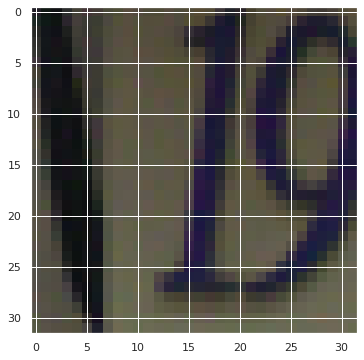

In [29]:
plt.imshow(X_second_ds_train[0])

plt.show()

In [0]:
IMAGE_DIM_0_2 = X_second_ds_train.shape[-3]
IMAGE_DIM_1_2 = X_second_ds_train.shape[-2]
IMAGE_DIM_2_2 = X_second_ds_train.shape[-1]

In [0]:
y_second_ds_train_cat = to_categorical(y_second_ds_train)
y_second_ds_test_cat = to_categorical(y_second_ds_test)

In [0]:
CLASSES_N_2 = y_second_ds_train_cat.shape[1]

In [0]:
model_2 = tf.keras.Sequential()

model_2.add(Conv2D(6, kernel_size = (5, 5), strides = (1, 1),
                   activation = 'tanh', padding = 'same',
                   input_shape = (IMAGE_DIM_0_2, IMAGE_DIM_1_2, IMAGE_DIM_2_2)))
model_2.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2),
                             padding = 'valid'))
model_2.add(Conv2D(16, kernel_size = (5, 5), strides = (1, 1),
                   activation = 'tanh', padding = 'valid'))
model_2.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2),
                             padding = 'valid'))
model_2.add(Flatten())
model_2.add(Dense(120, activation = 'tanh'))
model_2.add(Dense(84, activation = 'tanh'))
model_2.add(Dense(CLASSES_N_2, activation = 'softmax'))

In [0]:
model_2.compile(optimizer = 'adam',
                loss = 'categorical_crossentropy',
                metrics = ['categorical_accuracy'])

In [35]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 6)         456       
_________________________________________________________________
average_pooling2d_2 (Average (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               69240     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [0]:
history_2 = model_2.fit(x = X_second_ds_train, y = y_second_ds_train_cat,
                        validation_split = 0.15, epochs = EPOCHS_N, verbose = 0)

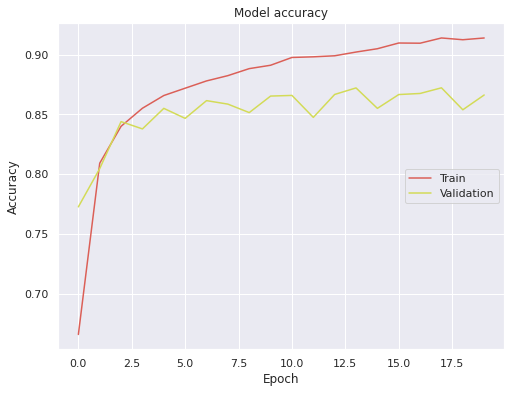

In [37]:
plot_accuracy(history_2, 'categorical_accuracy', 'val_categorical_accuracy')

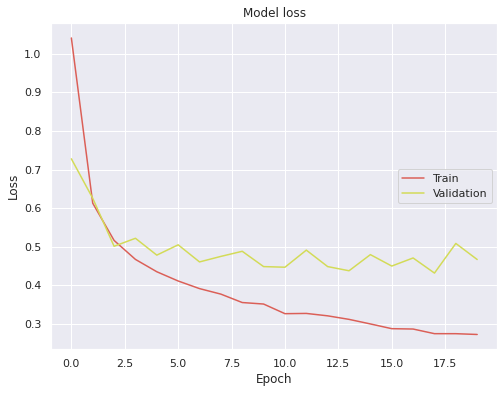

In [38]:
plot_loss(history_2)

In [39]:
results = model_2.evaluate(X_second_ds_test, y_second_ds_test_cat)

print('Test loss, test accuracy:', results)

Test loss, test accuracy: [0.5283718607362679, 0.8493777]


Здесь в модели изменилось то, что добавился ещё один класс &mdash; _нет цифры_.

Эти данные более сложны для распознавания, что повлияло на результат &mdash; точность распознавания на тестовой выборке составила 84%.

##### Несколько цифр

Загрузим первый датасет &mdash; реальные изображения с несколькими цифрами и рамками границ.

In [0]:
from imageio import imread
import pandas as pd

def image_to_array(_image):  
    try:
        array_ = imread(_image)

        return True, array_
    except:
        return False, None

def dir_to_dataframe(_dir_path):

    data_ = []

    files_ = sorted(os.listdir(_dir_path))

    for f in files_:
        file_path_ = os.path.join(_dir_path, f)
        
        can_read_, im = image_to_array(file_path_)

        if can_read_:
            data_.append(im)

    dataframe_ = pd.DataFrame()

    dataframe_['data'] = np.array(data_)

    return dataframe_

In [0]:
PROCESS = False

In [0]:
if PROCESS:
    first_ds_train_dir = tar_gz_to_dir(
        DS_URL_FOLDER, TRAIN_DS_NAME, FIRST_DS_EXT, 'first')
    first_ds_test_dir = tar_gz_to_dir(
        DS_URL_FOLDER, TEST_DS_NAME, FIRST_DS_EXT, 'first')

In [0]:
if PROCESS:
    first_ds_train_subdir = os.path.join(first_ds_train_dir, 'train')
    first_ds_test_subdir = os.path.join(first_ds_test_dir, 'test')

In [0]:
if PROCESS:
    first_ds_train_images_df = dir_to_dataframe(first_ds_train_subdir)
    first_ds_test_images_df = dir_to_dataframe(first_ds_test_subdir)

In [0]:
import h5py

if PROCESS:
    first_ds_train_boxes_mat = h5py.File(
        os.path.join(first_ds_train_subdir, 'digitStruct.mat'), 'r')
    first_ds_test_boxes_mat = h5py.File(
        os.path.join(first_ds_test_subdir, 'digitStruct.mat'), 'r')

In [0]:
import numpy as np
import pickle
import h5py

def mat_to_pickle(_mat_path, _key):

    f = h5py.File(_mat_path, 'r')

    metadata = {}

    metadata['height'] = []
    metadata['label'] = []
    metadata['left'] = []
    metadata['top'] = []
    metadata['width'] = []

    def print_attrs(name, obj):

        vals = []

        if obj.shape[0] == 1:
            vals.append(int(obj[0][0]))
        else:
            for k in range(obj.shape[0]):
                
                vals.append(int(f[obj[k][0]][0][0]))

        metadata[name].append(vals)

    for item in f['/digitStruct/bbox']:

        f[item[0]].visititems(print_attrs)

    with open('{}.pickle'.format((_key)),'wb') as pf:

        pickle.dump(metadata, pf, pickle.HIGHEST_PROTOCOL)

In [0]:
if PROCESS:
    mat_to_pickle(
        os.path.join(first_ds_train_subdir, 'digitStruct.mat'), 'train_bbox')
    mat_to_pickle(
        os.path.join(first_ds_test_subdir, 'digitStruct.mat'), 'test_bbox')

In [0]:
if PROCESS:
    train_bbox_data = np.load('train_bbox.pickle', allow_pickle = True)
    test_bbox_data = np.load('test_bbox.pickle', allow_pickle = True)

In [0]:
if PROCESS:
    plt.imshow(first_ds_train_images_df['data'][0])

    plt.show()

In [0]:
MAX_DIGITS = 6

In [0]:
def to_full_df(_ds_images_df, _bbox_data):

    LENGTH = len(_bbox_data['height'])

    BBOX_SHAPE_TUPLE = (LENGTH, MAX_DIGITS)

    bbox_heights = np.zeros(BBOX_SHAPE_TUPLE)
    bbox_labels = np.zeros(BBOX_SHAPE_TUPLE)
    bbox_lefts = np.zeros(BBOX_SHAPE_TUPLE)
    bbox_tops = np.zeros(BBOX_SHAPE_TUPLE)
    bbox_widths = np.zeros(BBOX_SHAPE_TUPLE)

    for i in range(LENGTH):

        j = 0

        l = len(_bbox_data['height'][i])

        while j < l:

            bbox_heights[i][j] = _bbox_data['height'][i][j]
            bbox_labels[i][j] = _bbox_data['label'][i][j]
            bbox_lefts[i][j] = _bbox_data['left'][i][j]
            bbox_tops[i][j] = _bbox_data['top'][i][j]
            bbox_widths[i][j] = _bbox_data['width'][i][j]

            j = j + 1

    data_dict_ = {
        'data': _ds_images_df['data'],

        'height_0': bbox_heights[:, 0],
        'label_0': bbox_labels[:, 0],
        'left_0': bbox_lefts[:, 0],
        'top_0': bbox_tops[:, 0],
        'width_0': bbox_widths[:, 0],

        'height_1': bbox_heights[:, 1],
        'label_1': bbox_labels[:, 1],
        'left_1': bbox_lefts[:, 1],
        'top_1': bbox_tops[:, 1],
        'width_1': bbox_widths[:, 1],

        'height_2': bbox_heights[:, 2],
        'label_2': bbox_labels[:, 2],
        'left_2': bbox_lefts[:, 2],
        'top_2': bbox_tops[:, 2],
        'width_2': bbox_widths[:, 2],

        'height_3': bbox_heights[:, 3],
        'label_3': bbox_labels[:, 3],
        'left_3': bbox_lefts[:, 3],
        'top_3': bbox_tops[:, 3],
        'width_3': bbox_widths[:, 3],

        'height_4': bbox_heights[:, 4],
        'label_4': bbox_labels[:, 4],
        'left_4': bbox_lefts[:, 4],
        'top_4': bbox_tops[:, 4],
        'width_4': bbox_widths[:, 4],

        'height_5': bbox_heights[:, 5],
        'label_5': bbox_labels[:, 5],
        'left_5': bbox_lefts[:, 5],
        'top_5': bbox_tops[:, 5],
        'width_5': bbox_widths[:, 5],
    }

    full_ds_ = pd.DataFrame(data_dict_,
                            columns = [
                                       'data',

                                       'height_0',
                                       'label_0',
                                       'left_0',
                                       'top_0',
                                       'width_0',

                                       'height_1',
                                       'label_1',
                                       'left_1',
                                       'top_1',
                                       'width_1',

                                       'height_2',
                                       'label_2',
                                       'left_2',
                                       'top_2',
                                       'width_2',

                                       'height_3',
                                       'label_3',
                                       'left_3',
                                       'top_3',
                                       'width_3',

                                       'height_4',
                                       'label_4',
                                       'left_4',
                                       'top_4',
                                       'width_4',

                                       'height_5',
                                       'label_5',
                                       'left_5',
                                       'top_5',
                                       'width_5',
                                       ])
    
    return full_ds_

In [0]:
if PROCESS:
    first_ds_train_full_df = to_full_df(
        first_ds_train_images_df, train_bbox_data)
    first_ds_test_full_df = to_full_df(
        first_ds_test_images_df, test_bbox_data)

In [0]:
def no_more_than_two_digits(_full_df):

    _2_digits_df = _full_df[_full_df['height_2'] == 0.0].reset_index()

    _2_digits_df = _2_digits_df.drop(columns = [
                                                'height_2',
                                                'label_2',
                                                'left_2',
                                                'top_2',
                                                'width_2',

                                                'height_3',
                                                'label_3',
                                                'left_3',
                                                'top_3',
                                                'width_3',

                                                'height_4',
                                                'label_4',
                                                'left_4',
                                                'top_4',
                                                'width_4',

                                                'height_5',
                                                'label_5',
                                                'left_5',
                                                'top_5',
                                                'width_5'
                                                ]) 
    
    return _2_digits_df

In [0]:
if PROCESS:
    first_ds_train_2_digits_df = no_more_than_two_digits(
        first_ds_train_full_df)
    first_ds_test_2_digits_df = no_more_than_two_digits(
        first_ds_test_full_df)

In [0]:
from math import ceil

def get_image_central_square(_image):

    dim_0 = _image.shape[0]
    dim_1 = _image.shape[1]

    if dim_0 == 0 or dim_1 == 0:

        print(_image.shape)

    cutoff_ = ceil(abs(dim_0 - dim_1) / 2)

    if dim_0 > dim_1:
        cut_image_ = _image[cutoff_:-cutoff_,
                            :,
                            :]
    elif dim_0 < dim_1:
        cut_image_ = _image[:,
                            cutoff_:-cutoff_,
                            :]
    else:
        cut_image_ = _image[:,
                            :,
                            :]

    return cut_image_

In [0]:
NEW_IMAGE_DIM = 50

In [0]:
import cv2

def resize_image(_image, _dim_0 = NEW_IMAGE_DIM, _dim_1 = NEW_IMAGE_DIM):

    try:
        resized_ = cv2.resize(_image, dsize = (_dim_0, _dim_1),
                              interpolation = cv2.INTER_CUBIC)
    except:
        print(_image.shape)
    
    return resized_

In [0]:
def process_image(_image):

    squared_ = get_image_central_square(_image)

    resized_ = resize_image(squared_)

    return resized_

In [0]:
def get_digits_n_from_row(_row):

    if _row['height_1'] != 0.0:
        return 2

    if _row['height_0'] != 0.0:
        return 1

    return 0

In [0]:
def to_new_format_dataframe(_dataframe):

    df_copy_ = _dataframe.copy()
    
    rrrr = df_copy_.apply(lambda row: process_image(row['data']), axis = 1)

    df_copy_.drop(columns = ['data'])

    df_copy_['data'] = rrrr

    nnnn = df_copy_.apply(lambda row: get_digits_n_from_row(row), axis = 1)

    df_copy_['digits_n'] = nnnn

    df_copy_['digit_0'] = df_copy_['label_0'].astype(int)
    df_copy_['digit_1'] = df_copy_['label_1'].astype(int)

    df_copy_ = df_copy_.drop(columns = [
                                        'height_0',
                                        'label_0',
                                        'left_0',
                                        'top_0',
                                        'width_0',

                                        'height_1',
                                        'label_1',
                                        'left_1',
                                        'top_1',
                                        'width_1'
                                       ])

    return df_copy_

In [0]:
if PROCESS:
    train_resized_df = to_new_format_dataframe(first_ds_train_2_digits_df)
    test_resized_df = to_new_format_dataframe(first_ds_test_2_digits_df)

In [0]:
if PROCESS:
    train_resized_df.to_pickle(
        '/content/drive/My Drive/Colab Files/mo-2/multidigit_train.pkl')
    test_resized_df.to_pickle(
        '/content/drive/My Drive/Colab Files/mo-2/multidigit_test.pkl')

In [0]:
train_multidigit_df = pd.read_pickle(
    '/content/drive/My Drive/Colab Files/mo-2/multidigit_train.pkl')
test_multidigit_df = pd.read_pickle(
    '/content/drive/My Drive/Colab Files/mo-2/multidigit_test.pkl')

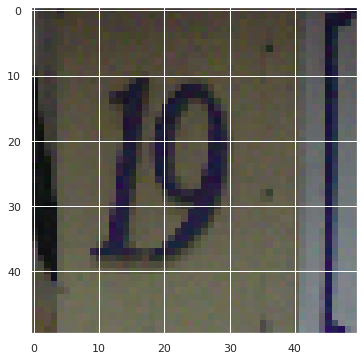

In [64]:
plt.imshow(train_multidigit_df['data'][0])

plt.show()

In [65]:
print('digits_n:', train_multidigit_df['digits_n'][0], '\t',
      'digit_0:', train_multidigit_df['digit_0'][0], '\t',
      'digit_1:', train_multidigit_df['digit_1'][0])

digits_n: 2 	 digit_0: 1 	 digit_1: 9


In [0]:
inputs = keras.Input(shape = (NEW_IMAGE_DIM, NEW_IMAGE_DIM, IMAGE_DIM_2_2))

In [0]:
from tensorflow.keras.layers import Dropout, MaxPooling2D

l_d_0_0 = Conv2D(16, kernel_size = (5, 5), strides = (1, 1),
                activation = 'relu', padding = 'same')(inputs)
l_d_0_1 = MaxPooling2D(pool_size = (2, 2), strides = 2,
                            padding = 'valid')(l_d_0_0)
l_d_0_2 = Dropout(0.2)(l_d_0_0)

l_d_1_0 = Conv2D(32, kernel_size = (5, 5), strides = (1, 1),
                activation = 'relu', padding = 'same')(l_d_0_2)
l_d_1_1 = MaxPooling2D(pool_size = (2, 2), strides = 1,
                            padding = 'valid')(l_d_1_0)
l_d_1_2 = Dropout(0.2)(l_d_1_0)

l_d_2_0 = Conv2D(64, kernel_size = (5, 5), strides = (1, 1),
                activation = 'relu', padding = 'same')(l_d_1_2)
l_d_2_1 = MaxPooling2D(pool_size = (2, 2), strides = 2,
                            padding = 'valid')(l_d_2_0)
l_d_2_2 = Dropout(0.2)(l_d_2_0)

l_fl_0 = Flatten()(l_d_2_2)
l_dense_0 = Dense(2400, activation = 'relu')(l_fl_0)

output_common = Dense(1200, activation = 'relu')(l_dense_0)

digits_n_output = Dense(2, activation = 'softmax', name = 'digits_n')(output_common)
digit_0_output = Dense(10, activation = 'softmax', name = 'digit_0')(output_common)
digit_1_output = Dense(11, activation = 'softmax', name = 'digit_1')(output_common)

In [0]:
def digits_n_loss(n_logits, n_labels):
    return tf.reduce_mean(
        tf.compat.v1.losses.softmax_cross_entropy(n_logits, n_labels))
    
def digit_0_loss(digit_0_logits, digit_0_labels):
    return tf.reduce_mean(
        tf.compat.v1.losses.softmax_cross_entropy(digit_0_logits, digit_0_labels))

def digit_1_loss(digit_1_logits, digit_1_labels):
    return tf.reduce_mean(
        tf.compat.v1.losses.softmax_cross_entropy(digit_1_logits, digit_1_labels))

losses = {
	'digits_n': digits_n_loss,
    'digit_0': digit_0_loss,
    'digit_1': digit_1_loss
}

loss_weights = {
    'digits_n': 1.0,
    'digit_0': 1.0,
    'digit_1': 1.0
}

In [0]:
model_3 = keras.Model(inputs = inputs,
                      outputs = [
                                 digits_n_output,
                                 digit_0_output,
                                 digit_1_output])

In [70]:
model_3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50, 50, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 50, 50, 16)   1216        input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 50, 50, 16)   0           conv2d_4[0][0]                   
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 50, 50, 32)   12832       dropout[0][0]                    
______________________________________________________________________________________________

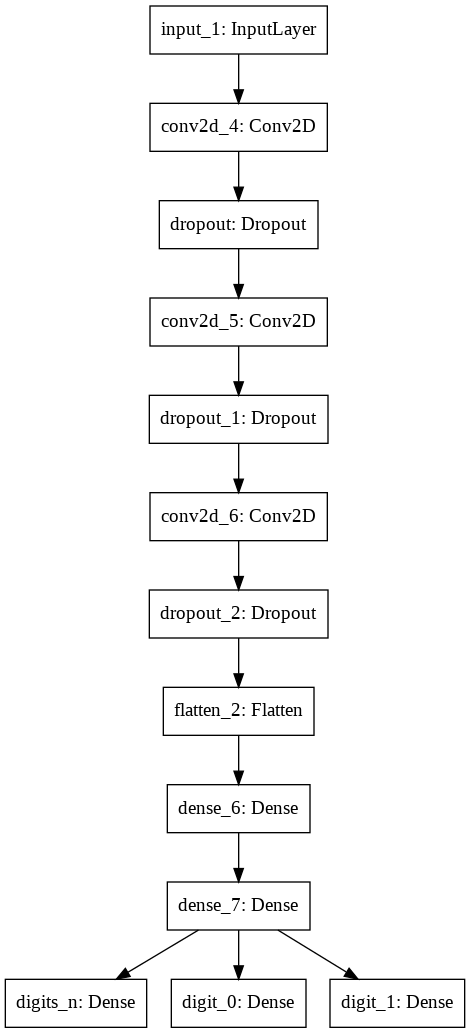

In [71]:
keras.utils.plot_model(model_3, 'multidigit.png')

In [0]:
X_multidigit = tf.keras.utils.normalize(np.asarray(list(train_multidigit_df['data'])), axis = 1)

y_n_multidigit = (to_categorical(train_multidigit_df['digits_n']
                                 .astype('category')
                                 .cat.codes.astype('int32')))
y_d_0_multidigit = (to_categorical(train_multidigit_df['digit_0']
                                   .astype('category')
                                   .cat.codes.astype('int32')))
y_d_1_multidigit = (to_categorical(train_multidigit_df['digit_1']
                                   .astype('category')
                                   .cat.codes.astype('int32')))

y_multidigit = [
                y_n_multidigit,
                y_d_0_multidigit,
                y_d_1_multidigit
               ]

In [0]:
model_3.compile(optimizer = 'adam',
                loss = losses, loss_weights = loss_weights,
                metrics = ['categorical_accuracy'])

In [0]:
history_3 = model_3.fit(x = X_multidigit,
                        y = y_multidigit,
                        epochs = 10,
                        validation_split = 0.15,
                        verbose = 0)

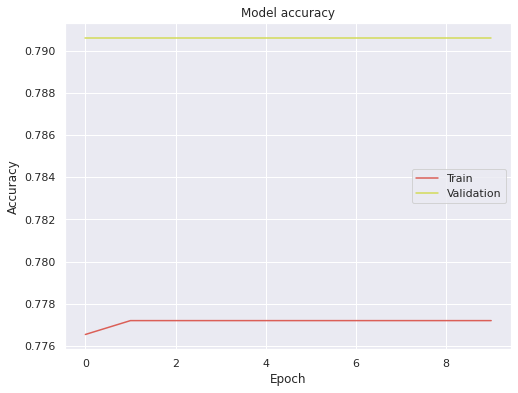

In [75]:
plot_accuracy(history_3, 'digits_n_categorical_accuracy', 'val_digits_n_categorical_accuracy')

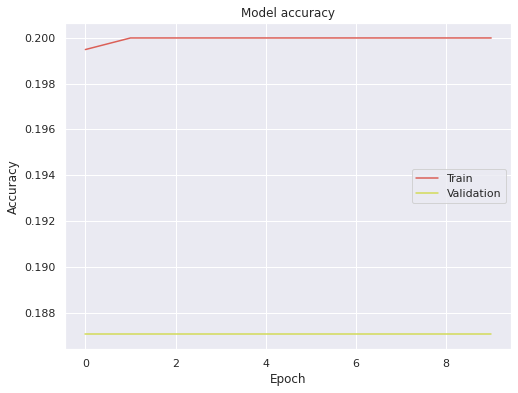

In [76]:
plot_accuracy(history_3, 'digit_0_categorical_accuracy', 'val_digit_0_categorical_accuracy')

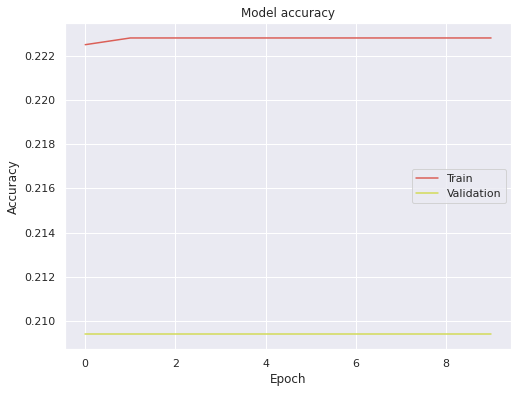

In [77]:
plot_accuracy(history_3, 'digit_1_categorical_accuracy', 'val_digit_1_categorical_accuracy')

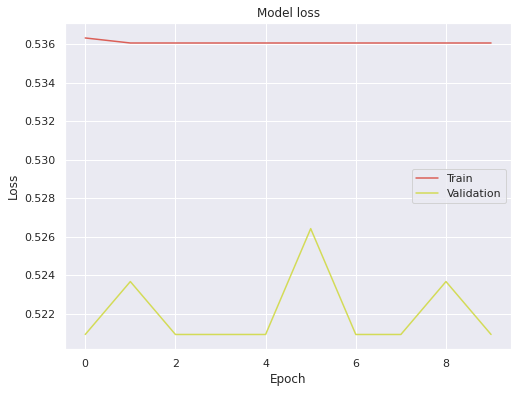

In [78]:
plot_loss(history_3, 'digits_n_loss', 'val_digits_n_loss')

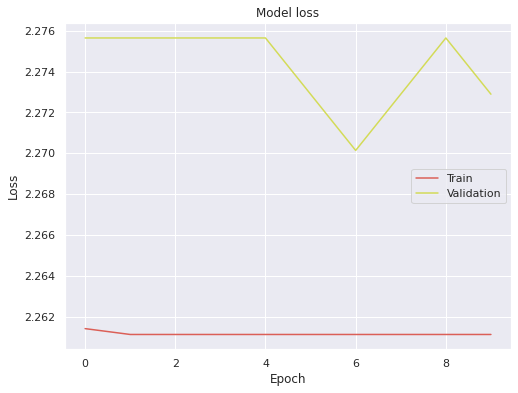

In [79]:
plot_loss(history_3, 'digit_0_loss', 'val_digit_0_loss')

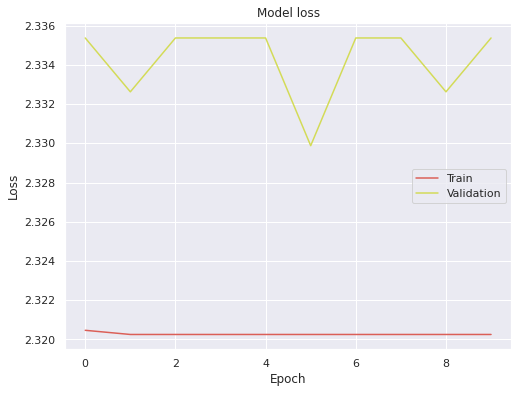

In [80]:
plot_loss(history_3, 'digit_1_loss', 'val_digit_1_loss')

In [0]:
X_test_multidigit = tf.keras.utils.normalize(
    np.asarray(list(test_multidigit_df['data'])), axis = 1)

y_n_test_multidigit = (to_categorical(test_multidigit_df['digits_n']
                                 .astype('category')
                                 .cat.codes.astype('int32')))
y_d_0_test_multidigit = (to_categorical(test_multidigit_df['digit_0']
                                   .astype('category')
                                   .cat.codes.astype('int32')))
y_d_1_test_multidigit = (to_categorical(test_multidigit_df['digit_1']
                                   .astype('category')
                                   .cat.codes.astype('int32')))

y_test_multidigit = [
                     y_n_test_multidigit,
                     y_d_0_test_multidigit,
                     y_d_1_test_multidigit
                    ]

In [82]:
results_3 = model_3.evaluate(X_test_multidigit, y_test_multidigit)

for i, k in enumerate(history_3.history.keys()):
    if i < len(results_3):
        print(k, '\t', results_3[i])

loss 	 5.093077011154151
digits_n_loss 	 0.5423692
digit_0_loss 	 2.236772
digit_1_loss 	 2.3139274
digits_n_categorical_accuracy 	 0.7709198
digit_0_categorical_accuracy 	 0.22437494
digit_1_categorical_accuracy 	 0.22908017


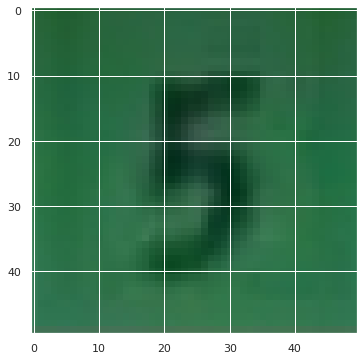

In [83]:
plt.imshow(test_multidigit_df['data'][0])

plt.show()

In [84]:
prediction_3 = model_3.predict(np.asarray([test_multidigit_df['data'][0]]))

print('digits_n:', prediction_3[0].squeeze(), '\n',
      'digit_0:', prediction_3[1].squeeze(), '\n',
      'digit_1:', prediction_3[2].squeeze())

digits_n: [0. 1.] 
 digit_0: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 
 digit_1: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Задание 3

Сделайте множество снимков изображений номеров домов с помощью смартфона на ОС _Android_. Также можно использовать библиотеки _OpenCV_, _Simple CV_ или _Pygame_ для обработки изображений с общедоступных камер видеонаблюдения (например, https://www.earthcam.com/).

В качестве примера использования библиотеки _TensorFlow_ на смартфоне можете воспользоваться демонстрационным приложением от _Google_ (https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/android).

### Задание 4

Реализуйте приложение для ОС _Android_, которое может распознавать цифры в номерах домов, используя разработанный ранее классификатор. Какова доля правильных классификаций?